<a href="https://colab.research.google.com/github/PedGit025/Charting-Digital-Future/blob/main/Emman_Copy_of_MRT_3_Optimal_Scheduling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **<h1>  Title: MRT3 - Optimal Scheduling</h1>**


#### **<h1 align="center">A project presented for Principles of Data Science </h1>**


<div style="text-align:center">
    <img src="https://upload.wikimedia.org/wikipedia/en/thumb/c/c2/De_La_Salle_University_Seal.svg/1200px-De_La_Salle_University_Seal.svg.png" alt="Alt text" width="150" height="150"/>
</div>

<br>

##### **<h1 align="center">Submitted by: <br> John Caleb Rejante <br> Emmanuel Pedernal <br> Lizelle Ann Cruz<br>Melanie Hauschild<br>Jose Alesandro Roxas<br><br><br> 9 December 2023 </h1>**

**<h1 align="center">Introduction</h1>**
<a id="0"></a>

 In this analysis, our primary focus is on unraveling the intricate patterns of passenger traffic over time across all MRT-3 stations. By delving into the temporal dynamics of passenger counts, we aim to identify both the lulls and peaks in activity, providing actionable insights for strategic operational adjustments.


 Specifically, we seek to pinpoint the times when each station experiences the least passenger load, offering opportunities for system maintenance and optimization during these downtimes. Simultaneously, we aim to identify the peak hours when stations, especially the busiest one, witness the highest passenger influx. This dual-pronged approach not only aids in operational planning for downtime but also equips the MRT-3 system to proactively prepare for and manage increased passenger demands during peak hours.






**<h1 align="center">Overview of Variables</h1>**
<a id="1"></a>

Our research is based on the dataset **DOTC-MRT3 HOURLY RIDERSHIP REPORT** from the Freedom of Information (FOI). It compiles $17,520$ observations collected from the whole year of $January-December$ $2022$. These $18$ factors listed below are then employed as explanatory variables.

1. `ID`: Unique identification for each datapoint of entr/exit.
2. `Date`: Date of the collected data from 1 January 2022 to 31 December 2022
3. `Start Time`: Start of the ridership duration
4. `End Time`: End of the ridership duration
5. `Type`: Categorical type of ridership (entry/exit)
6. `North Ave`: Number of riders who entered/exited North Avenue Station.
7. `Quezon Ave`: Number of riders who entered/exited Quezon Avenue Station.
8. `GMA Kamuning`: Number of riders who entered/exited GMA Kamuning Station.
9. `Cubao`: Number of riders who entered/exited Cubao Station.
10. `Santolan`: Number of riders who entered/exited Santolan Station.
11. `Ortigas`: Number of riders who entered/exited Ortigas Station.
12. `Shaw Blvd`: Number of riders who entered/exited Shaw Blvd Station.
13. `Boni Ave`: Number of riders who entered/exited Boni Ave Station.
14. `Guadalupe`: Number of riders who entered/exited Guadalupe Station.
15. `Buendia`: Number of riders who entered/exited Buendia Station.
16. `Ayala Ave`: Number of riders who entered/exited Ayala Ave Station.
17. `Magallanes`: Number of riders who entered/exited Magallanes Station.
18. `Taft`: Number of riders who entered/exited Taft Station.


These variables collectively offer a comprehensive view of the MRT3 ridership traffic, laying the groundwork for optimization modeling and analysis.


**<h1 align="center">Goal</h1>**
<a id="2"></a>

The Data Science team's goal: Leveraging the timestamp data per station, along with insights into the busiest station and its corresponding high-traffic times, our analysis is poised to deliver valuable recommendations for enhancing the overall efficiency and responsiveness of the MRT-3 system.


<h2 style="text-align: left;color:darkblue;font-size: 35px; ">Phase 1: Data Preprocessing
 <a id="Phase 1"></a>


<h2 style="text-align: left;color:darkblue;font-size: 20px; "> 1.1) Import of necessary libraries</h2>
<a id="1.1"></a>

In [ ]:
# Importing all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm
%matplotlib inline
from datetime import time
from google.colab import files
from google.colab import drive

# import warnings
# warnings.filterwarnings('ignore')

In [ ]:
pd.set_option('display.float_format', lambda x: '%.0f' % x)
pd.set_option('display.max_columns', None)


<h2 style="text-align: left;color:darkblue;font-size: 20px; "> 1.2) Extraction of the dataset</h2>
<a id="1.2"></a>

The dataset initially reveals information about MRT3's ridership report.

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Load the dataframe, will change on final notebook to use path instead of collab

df = pd.read_excel('/content/drive/Shared drives/Data Science Group 9/Final Project/MRT Consolidated.xlsx',skiprows=2)
df.columns = df.iloc[0]
df = df.iloc[1:].reset_index(drop=True)


In [ ]:
df.head(5)

,ID,Date,Start Time,End Time,Type,North Ave,Quezon Ave,GMA Kamuning,Cubao,Santolan,Ortigas,Shaw Blvd,Boni Ave,Guadalupe,Buendia,Ayala Ave,Magallanes,Taft
0,4456203:00 - 03:59,2022-01-01 00:00:00,03:00:00,03:59:59,Entry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4456203:00 - 03:59,2022-01-01 00:00:00,03:00:00,03:59:59,Exit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4456204:00 - 04:59,2022-01-01 00:00:00,04:00:00,04:59:59,Entry,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4456204:00 - 04:59,2022-01-01 00:00:00,04:00:00,04:59:59,Exit,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4456205:00 - 05:59,2022-01-01 00:00:00,05:00:00,05:59:59,Entry,0,0,0,0,0,0,0,0,0,0,0,0,0


<h2 style="text-align: left;color:darkblue;font-size: 20px; "> 1.3) Analyzing the structure of data</h2>
<a id="1.3"></a>

Data cleaning is always the first step in any data science project. At a glance, it is evident that there are items that has "all-null" station columns. Moreover, proper data type assignment and removing white space should also be done upon initial checking with the data.

<h2 style="text-align: left;color:darkblue;font-size: 20px; "> 1.4) Checking of unique and null values in each column</h2>
<a id="1.4"></a>

In [ ]:
unique_values = df.nunique()
unique = pd.DataFrame({'columns':unique_values.index, 'unique values':unique_values.values})
unique.reset_index(drop=True ,inplace=True)
unique

,columns,unique values
0,ID,8760
1,Date,365
2,Start Time,24
3,End Time,24
4,Type,2
5,North Ave,3089
6,Quezon Ave,1458
7,GMA Kamuning,2948
8,Cubao,3853
9,Santolan,1087


No significant findings in the "unique values checking" of the dataframe.

In [ ]:
null_values = df.isnull().any()
null = pd.DataFrame({'columns':null_values.index, 'null values':null_values.values})
null.reset_index(drop=True ,inplace=True)
null

,columns,null values
0,ID,False
1,Date,False
2,Start Time,False
3,End Time,False
4,Type,False
5,North Ave,True
6,Quezon Ave,True
7,GMA Kamuning,True
8,Cubao,True
9,Santolan,True


In [ ]:
# create a df where the station column values are null (or zero)

null_rows = df[df.iloc[:,5:].isnull().all(axis=1)]
zero_rows = df[df.iloc[:,5:].eq(0).all(axis=1)]

null_and_zero_df = pd.concat([null_rows, zero_rows],ignore_index=True)

#check the time duration where MRT3 has the most null (or zero) station columns
null_and_zero_df.groupby(['Start Time','End Time', 'Type'])['ID'].count().reset_index().sort_values('ID', ascending=False)

,Start Time,End Time,Type,ID
2,01:00:00,01:59:59,Entry,364
3,01:00:00,01:59:59,Exit,363
6,03:00:00,03:59:59,Entry,363
7,03:00:00,03:59:59,Exit,363
4,02:00:00,02:59:59,Entry,360
5,02:00:00,02:59:59,Exit,360
46,23:00:00,23:59:59,Entry,354
1,00:00:00,00:59:59,Exit,341
47,23:00:00,23:59:59,Exit,312
0,00:00:00,00:59:59,Entry,263


In [ ]:
#identify the dates where MRT3 is not operational for the whole day

filled_null_and_zero_df = null_and_zero_df.fillna(0).groupby('Date')['ID'].count().reset_index().sort_values('ID', ascending=False)
filled_null_and_zero_df[filled_null_and_zero_df.ID == 48]

,Date,ID
102,2022-04-13,48
106,2022-04-17,48
105,2022-04-16,48
104,2022-04-15,48
103,2022-04-14,48


Based on the *null_and_zero_df*, data is mostly not available between **23:00:00** to **3:59:59**. This is expected as the operating hours of MRT3 is from **4:30:00** to **22:30:00** (*Source*: *https://www.dotrmrt3.gov.ph/about-us*). Moreover, there are 5 days where the train has not operated for the whole day. These are the same dates of the **2022 Holy Week**.

<h2 style="text-align: left;color:darkblue;font-size: 35px; ">Phase 2: DataFrame information checking
 <a id="Phase 2"></a>

Our goal is to ensure that our final dataset is error-free and ready for use.

<h2 style="text-align: left;color:darkblue;font-size: 20px; "> 2.1) Checking the columns</h2>
<a id="2.1"></a>

In [ ]:
df.columns

Index(['ID', 'Date', 'Start Time', 'End Time', 'Type', 'North Ave',
       'Quezon Ave', 'GMA Kamuning', 'Cubao', 'Santolan', 'Ortigas',
       'Shaw Blvd', 'Boni Ave', 'Guadalupe', 'Buendia', 'Ayala Ave',
       'Magallanes', 'Taft'],
      dtype='object', name=0)

<h2 style="text-align: left;color:darkblue;font-size: 20px; "> 2.2) Checking the dtypes</h2>
<a id="2.2"></a>

In [ ]:
print(f"The data type of Start Time is {type(df['Start Time'][0])}")
print(f"The data type of End Time is {type(df['End Time'][0])}")

The data type of Start Time is <class 'datetime.time'>
The data type of End Time is <class 'str'>


As seen above, **End Time** column is of *<class 'str'>*, this needs to be typcasted to datetime.time

In [ ]:
df.dtypes

0
ID              object
Date            object
Start Time      object
End Time        object
Type            object
North Ave       object
Quezon Ave      object
GMA Kamuning    object
Cubao           object
Santolan        object
Ortigas         object
Shaw Blvd       object
Boni Ave        object
Guadalupe       object
Buendia         object
Ayala Ave       object
Magallanes      object
Taft            object
dtype: object

<h2 style="text-align: left;color:darkblue;font-size: 20px; "> 2.3) Checking the info()</h2>
<a id="2.3"></a>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            17520 non-null  object
 1   Date          17520 non-null  object
 2   Start Time    17520 non-null  object
 3   End Time      17520 non-null  object
 4   Type          17520 non-null  object
 5   North Ave     14358 non-null  object
 6   Quezon Ave    14367 non-null  object
 7   GMA Kamuning  14369 non-null  object
 8   Cubao         14371 non-null  object
 9   Santolan      14369 non-null  object
 10  Ortigas       14265 non-null  object
 11  Shaw Blvd     14367 non-null  object
 12  Boni Ave      14368 non-null  object
 13  Guadalupe     14266 non-null  object
 14  Buendia       14338 non-null  object
 15  Ayala Ave     14362 non-null  object
 16  Magallanes    14365 non-null  object
 17  Taft          14362 non-null  object
dtypes: object(18)
memory usage: 2.4+ MB


- The total number of columns is $17$
- The total number of entries is $17520$
- Station columns are all $float64$ dtypes
- The **End Time** column is not in its proper dtype
- Nulls were already investigated

<h2 style="text-align: left;color:darkblue;font-size: 20px; "> 2.4) Checking the describe()</h2>
<a id="2.4"></a>

In [ ]:
df[df.Type == 'Entry'].describe().T

,count,unique,top,freq
0,,,,
ID,8760,8760,4456203:00 - 03:59,1
Date,8760,365,2022-01-01 00:00:00,24
Start Time,8760,24,03:00:00,365
End Time,8760,24,03:59:59,365
Type,8760,1,Entry,8760
North Ave,7179,2367,0,707
Quezon Ave,7184,1368,0,363
GMA Kamuning,7184,2433,0,353
Cubao,7184,2838,0,354


**Entry in Stations**
- The average number of passengers entering each station at any given hour is around 265.92 to 1846.19.
- The minimum number of passengers is zero since there are days where MRT3 did not operate.
- Based on the mean of each station, **Taft** is possibly the busiest entry station with an average of $1846.19$ passengers per hour with **Shaw Blvd** being the second busiest.
- In contrast, **Santolan** station has the least number of entering passengers per hour on average ($265.91$ number of passengers). Even at its peak, the maximum number of hourly passengers is only at $1177$.

In [ ]:
df[df.Type == 'Exit'].describe().T

,count,unique,top,freq
0,,,,
ID,8760,8760,4456203:00 - 03:59,1
Date,8760,365,2022-01-01 00:00:00,24
Start Time,8760,24,03:00:00,365
End Time,8760,24,03:59:59,365
Type,8760,1,Exit,8760
North Ave,7179,2510,0,786
Quezon Ave,7183,1307,0,418
GMA Kamuning,7185,2319,0,352
Cubao,7187,3081,0,346


**Exit in Stations**
- The average number of passengers exiting each station at any given hour is around 269.17 to 1864.82.
- The minimum number of passengers is zero since there are days where MRT3 did not operate.
- Based on the mean of each station, **Taft** is possibly the busiest exit station with an average of $1864.82$ passengers per hour with **Cubao** being the second busiest.
- In contrast, **Santolan** station has the least number of entering passengers per hour on average ($269.17$ number of passengers). Even at its peak, the maximum number of hourly passengers is only at $1186$.

<h2 style="text-align: left;color:darkblue;font-size: 35px; ">Phase 3: Data Cleaning
 <a id="Phase 3"></a>

To ensure that the dataframe to be used for the EDA and modelling will yield prudent and error-free results, it is important to clean the dataframe first before proceeding to the next step. We will be adopting the conservative approach to drop the rows where MRT3 the time duration is beyond operating hours. Moreover, we will be replacing a zero value for the days where the MRT3 did not operate for the day (during the Holy Week or any other instance). It is also imperative to properly typecast the **End Time** column to a *<class 'datetime.time'>*.


<h2 style="text-align: left;color:darkblue;font-size: 20px; "> 3.1) Typecasting the End Time column</h2>
<a id="3.1"></a>

In [ ]:
# strip str dtypes

df = df.applymap(lambda x: x.strip() if isinstance(x,str) else x)

# convert start and end time from string to datetime.time

df['Start Time'] = pd.to_datetime(df['Start Time'], format='%H:%M:%S').dt.time
df['End Time'] = pd.to_datetime(df['End Time'], format='%H:%M:%S').dt.time

In [ ]:
print(f"The data type of Start Time is {type(df['Start Time'][0])}")
print(f"The data type of End Time is {type(df['End Time'][0])}")

The data type of Start Time is <class 'datetime.time'>
The data type of End Time is <class 'datetime.time'>


<h2 style="text-align: left;color:darkblue;font-size: 20px; "> 3.2) Dropping Rows Beyond Operational Hours</h2>
<a id="3.2"></a>

In [ ]:
print(f"Dataset size before:\t{df.shape[0]}")
df = df.drop(df[(df['Start Time'] == time(23,0,0)) |
           (df['Start Time'] == time(0,0,0)) |
           (df['Start Time'] == time(1,0,0)) |
           (df['Start Time'] == time(2,0,0)) |
           (df['Start Time'] == time(3,0,0))].index)
print(f"Dataset size after:\t{df.shape[0]}")

Dataset size before:	17520
Dataset size after:	13870


<h2 style="text-align: left;color:darkblue;font-size: 20px; "> 3.3) Replacing Null Values with Zero</h2>
<a id="3.3"></a>

In [ ]:
df = df.fillna(0)
df

,ID,Date,Start Time,End Time,Type,North Ave,Quezon Ave,GMA Kamuning,Cubao,Santolan,Ortigas,Shaw Blvd,Boni Ave,Guadalupe,Buendia,Ayala Ave,Magallanes,Taft
2,4456204:00 - 04:59,2022-01-01,04:00:00,04:59:59,Entry,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4456204:00 - 04:59,2022-01-01,04:00:00,04:59:59,Exit,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4456205:00 - 05:59,2022-01-01,05:00:00,05:59:59,Entry,0,0,0,0,0,0,0,0,0,0,0,0,0
5,4456205:00 - 05:59,2022-01-01,05:00:00,05:59:59,Exit,0,0,0,0,0,0,0,0,0,0,0,0,0
6,4456206:00 - 06:59,2022-01-01,06:00:00,06:59:59,Entry,227,177,453,482,27,157,454,150,227,58,199,221,525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17507,4492620:00 - 20:59,2022-12-31,20:00:00,20:59:59,Entry,0,8,32,101,49,271,325,135,325,44,248,83,439
17508,4492621:00 - 21:59,2022-12-31,21:00:00,21:59:59,Exit,1,0,0,0,0,0,0,0,0,0,0,0,0
17509,4492621:00 - 21:59,2022-12-31,21:00:00,21:59:59,Entry,0,0,0,0,0,0,0,0,0,0,0,0,0
17510,4492622:00 - 22:59,2022-12-31,22:00:00,22:59:59,Exit,0,0,0,0,0,0,0,0,0,0,0,0,0


<h2 style="text-align: left;color:darkblue;font-size: 35px; ">Phase 4: EDA
 <a id="Phase 5"></a>

# Ordinal value for months

In [ ]:
df['Month'] = pd.DatetimeIndex(df['Date']).month

In [ ]:
numeric_columns = ['North Ave', 'Quezon Ave', 'GMA Kamuning', 'Cubao', 'Santolan',
                    'Ortigas', 'Shaw Blvd', 'Boni Ave', 'Guadalupe', 'Buendia',
                    'Ayala Ave', 'Magallanes', 'Taft']

df['Total'] = df[numeric_columns].sum(axis=1)

df['Average'] = df[numeric_columns].mean(axis=1)
df['Start DateTime'] = df.apply(lambda row: pd.datetime.combine(row['Date'], row['Start Time']), axis=1)
df['End DateTime'] = df.apply(lambda row: pd.datetime.combine(row['Date'], row['End Time']), axis=1)
df.drop('Start Time', axis=1, inplace=True)
df.drop('End Time', axis=1, inplace=True)

<ipython-input-24-f6ccda39bbc0>:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  df['Start DateTime'] = df.apply(lambda row: pd.datetime.combine(row['Date'], row['Start Time']), axis=1)
<ipython-input-24-f6ccda39bbc0>:9: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  df['End DateTime'] = df.apply(lambda row: pd.datetime.combine(row['Date'], row['End Time']), axis=1)


In [ ]:
df

,ID,Date,Type,North Ave,Quezon Ave,GMA Kamuning,Cubao,Santolan,Ortigas,Shaw Blvd,Boni Ave,Guadalupe,Buendia,Ayala Ave,Magallanes,Taft,Month,Total,Average,Start DateTime,End DateTime
2,4456204:00 - 04:59,2022-01-01,Entry,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2022-01-01 04:00:00,2022-01-01 04:59:59
3,4456204:00 - 04:59,2022-01-01,Exit,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2022-01-01 04:00:00,2022-01-01 04:59:59
4,4456205:00 - 05:59,2022-01-01,Entry,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2022-01-01 05:00:00,2022-01-01 05:59:59
5,4456205:00 - 05:59,2022-01-01,Exit,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2022-01-01 05:00:00,2022-01-01 05:59:59
6,4456206:00 - 06:59,2022-01-01,Entry,227,177,453,482,27,157,454,150,227,58,199,221,525,1,3357,258,2022-01-01 06:00:00,2022-01-01 06:59:59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17507,4492620:00 - 20:59,2022-12-31,Entry,0,8,32,101,49,271,325,135,325,44,248,83,439,12,2060,158,2022-12-31 20:00:00,2022-12-31 20:59:59
17508,4492621:00 - 21:59,2022-12-31,Exit,1,0,0,0,0,0,0,0,0,0,0,0,0,12,1,0,2022-12-31 21:00:00,2022-12-31 21:59:59
17509,4492621:00 - 21:59,2022-12-31,Entry,0,0,0,0,0,0,0,0,0,0,0,0,0,12,0,0,2022-12-31 21:00:00,2022-12-31 21:59:59
17510,4492622:00 - 22:59,2022-12-31,Exit,0,0,0,0,0,0,0,0,0,0,0,0,0,12,0,0,2022-12-31 22:00:00,2022-12-31 22:59:59


# Univariate Passenger Count

In [ ]:
df.dtypes

0
ID                        object
Date              datetime64[ns]
Type                      object
North Ave                float64
Quezon Ave               float64
GMA Kamuning             float64
Cubao                    float64
Santolan                 float64
Ortigas                  float64
Shaw Blvd                float64
Boni Ave                 float64
Guadalupe                float64
Buendia                  float64
Ayala Ave                float64
Magallanes               float64
Taft                     float64
Month                      int64
Total                    float64
Average                  float64
Start DateTime    datetime64[ns]
End DateTime      datetime64[ns]
dtype: object

In [ ]:
df['Date'].describe(datetime_is_numeric=True).T

count                            13870
mean     2022-07-01 23:59:59.999999744
min                2022-01-01 00:00:00
25%                2022-04-02 00:00:00
50%                2022-07-02 00:00:00
75%                2022-10-01 00:00:00
max                2022-12-31 00:00:00
Name: Date, dtype: object

In [ ]:
#create a new df with stations names and count only

station_columns = ['North Ave', 'Quezon Ave', 'GMA Kamuning', 'Cubao', 'Santolan',
                    'Ortigas', 'Shaw Blvd', 'Boni Ave', 'Guadalupe', 'Buendia',
                    'Ayala Ave', 'Magallanes', 'Taft']

station_counts = pd.DataFrame(index=df['Month'].unique(), columns=station_columns)


for station in station_columns:
    counts_per_month = df.groupby('Month')[station].sum()
    station_counts[station] = counts_per_month


station_counts['Total'] = station_counts.sum(axis=1)
station_counts['Average'] = station_counts.mean(axis=1)

station_counts

,North Ave,Quezon Ave,GMA Kamuning,Cubao,Santolan,Ortigas,Shaw Blvd,Boni Ave,Guadalupe,Buendia,Ayala Ave,Magallanes,Taft,Total,Average
1,748007,325370,860764,1160067,182608,589266,1168738,580245,781302,170149,655275,411269,1203267,8836327,1262332
2,938684,405857,1009965,1394843,217510,697685,1365586,677601,923515,217602,787372,479660,1473026,10588906,1512701
3,1310086,561403,1335362,1875878,291788,989078,1806348,903346,1220556,322670,1096535,652997,2000224,14366271,2052324
4,1396656,578492,1278551,1903138,281950,1001927,1764960,946257,1251430,332608,1147164,666776,2061645,14611554,2087365
5,1772730,736218,1639913,2528823,349743,1306632,2350799,1242965,1651769,425001,1573856,900889,2654966,19134304,2733472
6,1937946,858229,1796421,2769115,389812,1460140,2588467,1354753,1808473,477878,1709771,1008476,2903296,21062777,3008968
7,1558929,685602,1483550,2384366,334220,1231406,2302797,1175048,1480429,387541,1443449,891169,2424444,17782950,2540421
8,1528163,683699,1461245,2395003,335328,1253237,2328990,1214656,1485509,398422,1473589,927282,2441843,17926966,2560995
9,1472438,681636,1391599,2319712,331922,1230209,2294931,1213244,1448542,395548,1463923,920382,2359044,17523130,2503304
10,1507489,695895,1416914,2402234,338394,1241141,2376417,1262322,1480577,384705,1477445,949522,2429378,17962433,2566062


In [ ]:
monthly_count = df.groupby(['Month'])['Total'].sum()
monthly_count

Month
1     8836327
2    10588906
3    14366271
4    14611554
5    19134304
6    21062777
7    17782950
8    17926966
9    17523130
10   17962433
11   17850165
12   18571338
Name: Total, dtype: float64

In [ ]:
ave_monthly_count = df.groupby(['Month'])['Total'].mean()
ave_monthly_count

Month
1     7501
2     9952
3    12195
4    12817
5    16243
6    18476
7    15096
8    15218
9    15371
10   15248
11   15658
12   15765
Name: Total, dtype: float64

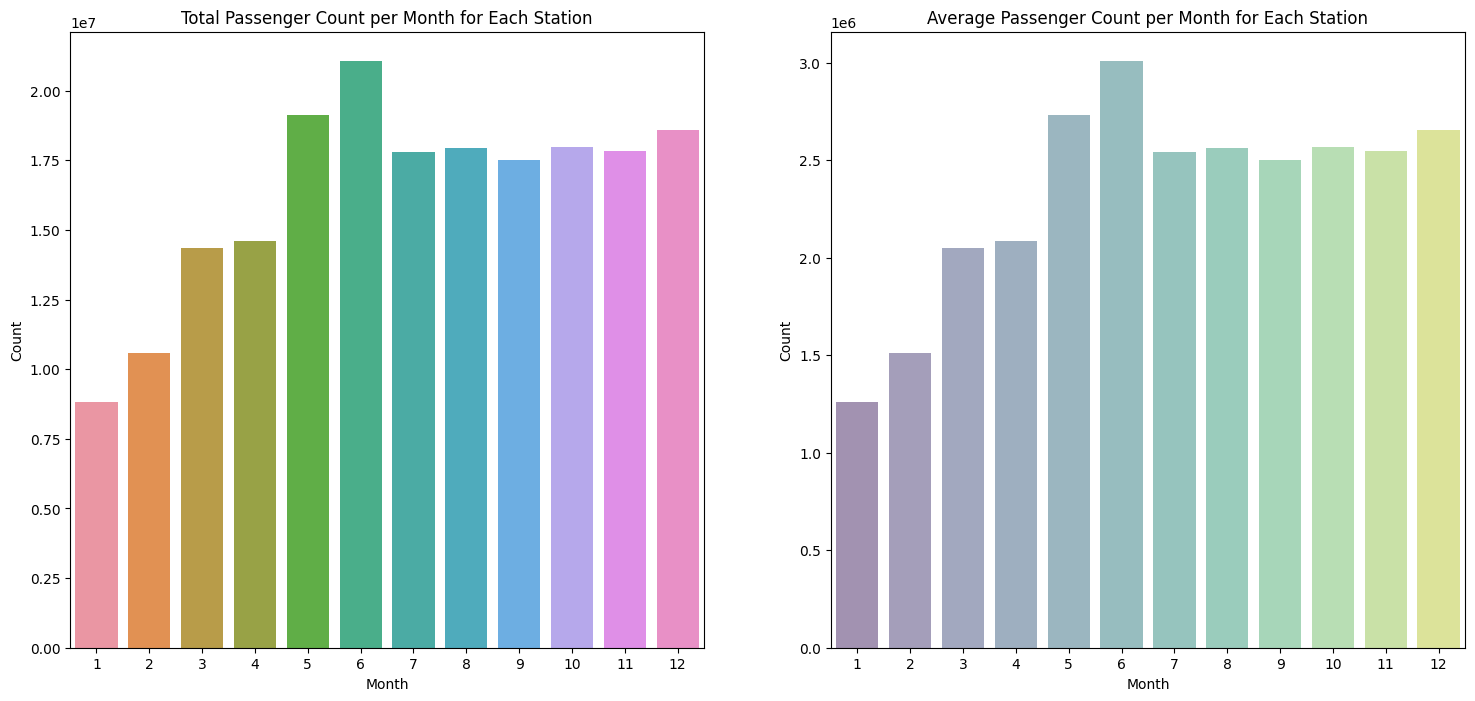

In [ ]:

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

# Plot 'Total' in the first subplot
sns.barplot(x=station_counts.index, y='Total', data=station_counts, label='Total', ax=ax1)
ax1.set_title('Total Passenger Count per Month for Each Station')
ax1.set_xlabel('Month')
ax1.set_ylabel('Count')

# Plot 'Average' in the second subplot
sns.barplot(x=station_counts.index, y='Average', data=station_counts, label='Average', alpha=0.5, ax=ax2, palette='viridis')
ax2.set_title('Average Passenger Count per Month for Each Station')
ax2.set_xlabel('Month')
ax2.set_ylabel('Count')

plt.show()

# 1e7 means less than or equal to 1 * 10^7 or tens millions and 1e6 is miliions

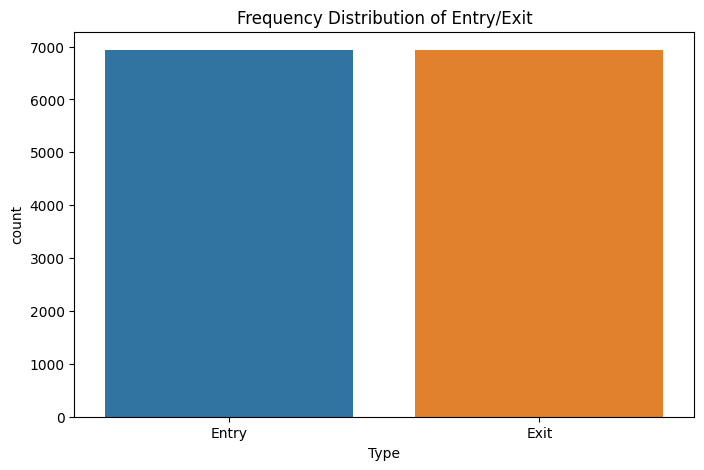

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Type', data=df)
plt.title('Frequency Distribution of Entry/Exit')
plt.show()

In [ ]:
type_counts = df['Type'].value_counts()
type_percentages = df['Type'].value_counts(normalize=True) * 100

print("Type Counts:")
print(type_counts)

print("\nType Percentages:")
print(type_percentages)

#weird that there a difference with entry/exit BUT what does that mean?
#this maybe due to location where its residensial/work place like makati CBD
# time of day

Type Counts:
Entry    6935
Exit     6935
Name: Type, dtype: int64

Type Percentages:
Entry   50
Exit    50
Name: Type, dtype: float64


In [ ]:
numeric_columns = ['North Ave', 'Quezon Ave', 'GMA Kamuning', 'Cubao', 'Santolan', 'Ortigas', 'Shaw Blvd', 'Boni Ave', 'Guadalupe', 'Buendia', 'Ayala Ave', 'Magallanes', 'Taft', 'Total', 'Average']

descriptive_stats = df[numeric_columns].describe()
descriptive_stats

#mean is hourly

,North Ave,Quezon Ave,GMA Kamuning,Cubao,Santolan,Ortigas,Shaw Blvd,Boni Ave,Guadalupe,Buendia,Ayala Ave,Magallanes,Taft,Total,Average
count,13870,13870,13870,13870,13870,13870,13870,13870,13870,13870,13870,13870,13870,13870,13870
mean,1245,552,1187,1876,269,973,1810,943,1194,308,1142,700,1949,14147,1088
std,808,333,753,1041,224,738,978,555,635,319,776,534,1047,7424,571
min,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
25%,728,325,700,1212,118,502,1257,577,837,125,619,343,1350,9766,751
50%,1176,517,1058,1893,224,828,1757,899,1188,222,1048,589,2043,14061,1082
75%,1594,730,1513,2369,328,1189,2316,1237,1584,336,1550,922,2528,18422,1417
max,4387,1689,4565,6465,1186,3855,4988,2701,3556,1803,5095,2743,6260,35700,2746


# Univariate Start time and End time

In [ ]:
df['Start Time'] = df['Start DateTime'].dt.time
df['End Time'] = df['End DateTime'].dt.time
df.dtypes

0
ID                        object
Date              datetime64[ns]
Type                      object
North Ave                float64
Quezon Ave               float64
GMA Kamuning             float64
Cubao                    float64
Santolan                 float64
Ortigas                  float64
Shaw Blvd                float64
Boni Ave                 float64
Guadalupe                float64
Buendia                  float64
Ayala Ave                float64
Magallanes               float64
Taft                     float64
Month                      int64
Total                    float64
Average                  float64
Start DateTime    datetime64[ns]
End DateTime      datetime64[ns]
Start Time                object
End Time                  object
dtype: object

In [ ]:
df

,ID,Date,Type,North Ave,Quezon Ave,GMA Kamuning,Cubao,Santolan,Ortigas,Shaw Blvd,Boni Ave,Guadalupe,Buendia,Ayala Ave,Magallanes,Taft,Month,Total,Average,Start DateTime,End DateTime,Start Time,End Time
2,4456204:00 - 04:59,2022-01-01,Entry,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2022-01-01 04:00:00,2022-01-01 04:59:59,04:00:00,04:59:59
3,4456204:00 - 04:59,2022-01-01,Exit,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2022-01-01 04:00:00,2022-01-01 04:59:59,04:00:00,04:59:59
4,4456205:00 - 05:59,2022-01-01,Entry,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2022-01-01 05:00:00,2022-01-01 05:59:59,05:00:00,05:59:59
5,4456205:00 - 05:59,2022-01-01,Exit,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2022-01-01 05:00:00,2022-01-01 05:59:59,05:00:00,05:59:59
6,4456206:00 - 06:59,2022-01-01,Entry,227,177,453,482,27,157,454,150,227,58,199,221,525,1,3357,258,2022-01-01 06:00:00,2022-01-01 06:59:59,06:00:00,06:59:59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17507,4492620:00 - 20:59,2022-12-31,Entry,0,8,32,101,49,271,325,135,325,44,248,83,439,12,2060,158,2022-12-31 20:00:00,2022-12-31 20:59:59,20:00:00,20:59:59
17508,4492621:00 - 21:59,2022-12-31,Exit,1,0,0,0,0,0,0,0,0,0,0,0,0,12,1,0,2022-12-31 21:00:00,2022-12-31 21:59:59,21:00:00,21:59:59
17509,4492621:00 - 21:59,2022-12-31,Entry,0,0,0,0,0,0,0,0,0,0,0,0,0,12,0,0,2022-12-31 21:00:00,2022-12-31 21:59:59,21:00:00,21:59:59
17510,4492622:00 - 22:59,2022-12-31,Exit,0,0,0,0,0,0,0,0,0,0,0,0,0,12,0,0,2022-12-31 22:00:00,2022-12-31 22:59:59,22:00:00,22:59:59


In [ ]:
grouped_df = df.groupby(['Start Time', 'End Time'])['Total'].mean().reset_index()
grouped_df

,Start Time,End Time,Total
0,04:00:00,04:59:59,1087
1,05:00:00,05:59:59,9937
2,06:00:00,06:59:59,17754
3,07:00:00,07:59:59,20406
4,08:00:00,08:59:59,17674
5,09:00:00,09:59:59,15602
6,10:00:00,10:59:59,13277
7,11:00:00,11:59:59,12982
8,12:00:00,12:59:59,12809
9,13:00:00,13:59:59,12152


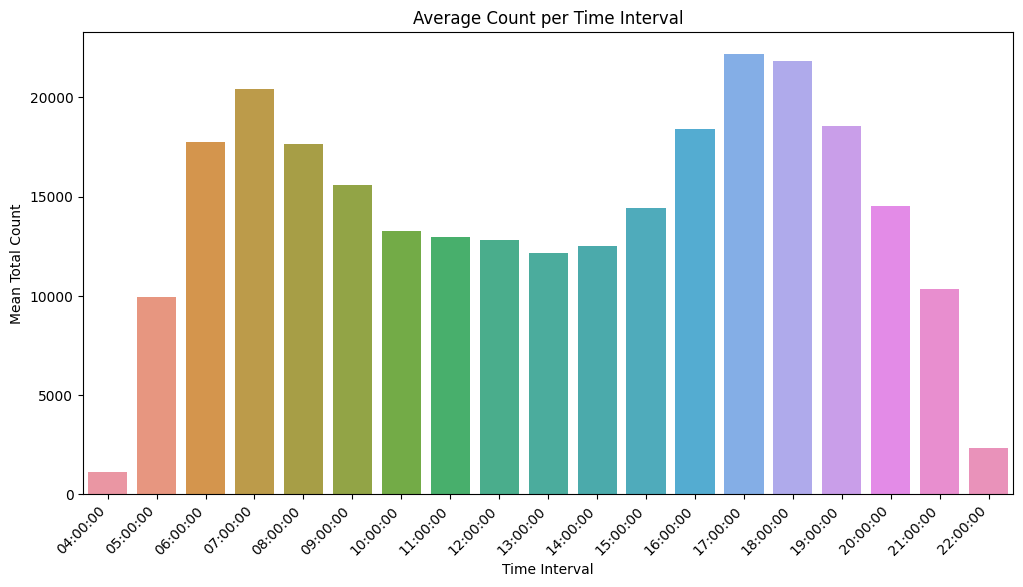

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Start Time', y='Total', data=grouped_df)
plt.title('Average Count per Time Interval')
plt.xlabel('Time Interval')
plt.ylabel('Mean Total Count')
plt.xticks(rotation=45, ha='right')
plt.show()

#Add insigths here sample what if youre an office boy, regular commuter, student etc what time should u leave when going to and from specific location

# Bivariate

## Daily Volume and Monthly

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['DayOfWeek'] = df['Date'].dt.dayofweek
df.head(10)

,ID,Date,Type,North Ave,Quezon Ave,GMA Kamuning,Cubao,Santolan,Ortigas,Shaw Blvd,Boni Ave,Guadalupe,Buendia,Ayala Ave,Magallanes,Taft,Month,Total,Average,Start DateTime,End DateTime,Start Time,End Time,DayOfWeek
2,4456204:00 - 04:59,2022-01-01,Entry,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2022-01-01 04:00:00,2022-01-01 04:59:59,04:00:00,04:59:59,5
3,4456204:00 - 04:59,2022-01-01,Exit,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2022-01-01 04:00:00,2022-01-01 04:59:59,04:00:00,04:59:59,5
4,4456205:00 - 05:59,2022-01-01,Entry,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2022-01-01 05:00:00,2022-01-01 05:59:59,05:00:00,05:59:59,5
5,4456205:00 - 05:59,2022-01-01,Exit,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2022-01-01 05:00:00,2022-01-01 05:59:59,05:00:00,05:59:59,5
6,4456206:00 - 06:59,2022-01-01,Entry,227,177,453,482,27,157,454,150,227,58,199,221,525,1,3357,258,2022-01-01 06:00:00,2022-01-01 06:59:59,06:00:00,06:59:59,5
7,4456206:00 - 06:59,2022-01-01,Exit,75,32,159,240,31,126,350,137,202,47,140,46,156,1,1741,134,2022-01-01 06:00:00,2022-01-01 06:59:59,06:00:00,06:59:59,5
8,4456207:00 - 07:59,2022-01-01,Entry,233,135,498,556,40,273,627,265,308,88,242,273,610,1,4148,319,2022-01-01 07:00:00,2022-01-01 07:59:59,07:00:00,07:59:59,5
9,4456207:00 - 07:59,2022-01-01,Exit,288,134,461,622,52,212,488,227,334,84,380,151,841,1,4274,329,2022-01-01 07:00:00,2022-01-01 07:59:59,07:00:00,07:59:59,5
10,4456208:00 - 08:59,2022-01-01,Entry,355,111,525,619,34,181,542,261,395,68,259,229,684,1,4263,328,2022-01-01 08:00:00,2022-01-01 08:59:59,08:00:00,08:59:59,5
11,4456208:00 - 08:59,2022-01-01,Exit,347,185,383,601,58,202,492,212,294,68,372,111,847,1,4172,321,2022-01-01 08:00:00,2022-01-01 08:59:59,08:00:00,08:59:59,5


In [ ]:
grouped_by_day_month = df.groupby(['DayOfWeek', 'Month'])['Total'].sum().reset_index()
grouped_by_day_month

,DayOfWeek,Month,Total
0,0,1,1685070
1,0,2,1771936
2,0,3,2046874
3,0,4,2482407
4,0,5,3148535
...,...,...,...
79,6,8,1532724
80,6,9,1444152
81,6,10,1955732
82,6,11,1651385


In [ ]:
total_counts_by_day = df.groupby('DayOfWeek')['Total'].sum().reset_index()
total_counts_by_day

,DayOfWeek,Total
0,0,30067598
1,1,30330967
2,2,30314557
3,3,30037653
4,4,30962324
5,5,25385638
6,6,19118384


In [ ]:
total_counts_by_month = df.groupby('Month')['Total'].sum().reset_index()
total_counts_by_month = total_counts_by_month.sort_values(by='Total', ascending=False)

total_counts_by_month

,Month,Total
5,6,21062777
4,5,19134304
11,12,18571338
9,10,17962433
7,8,17926966
10,11,17850165
6,7,17782950
8,9,17523130
3,4,14611554
2,3,14366271


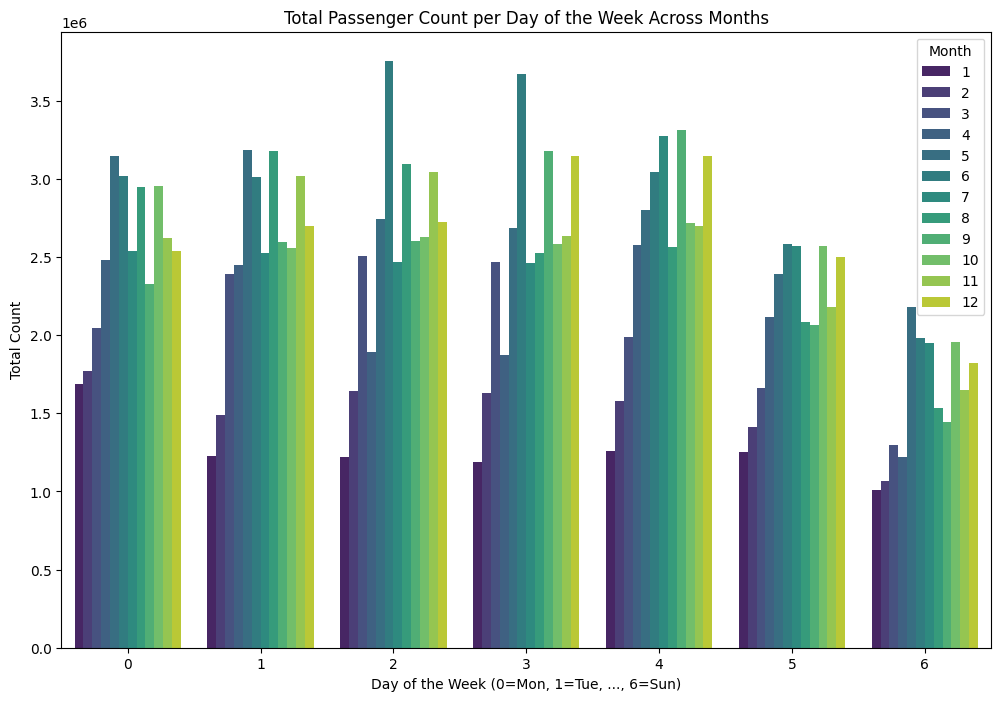

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='DayOfWeek', y='Total', hue='Month', data=grouped_by_day_month, palette='viridis')
plt.title('Total Passenger Count per Day of the Week Across Months')
plt.xlabel('Day of the Week (0=Mon, 1=Tue, ..., 6=Sun)')
plt.ylabel('Total Count')
plt.show()

#from the graph friday is busiest but not long shot from thursday, sunday is the lowest with june the busiest and January look at above codes for exact vals

In [ ]:
df

,ID,Date,Type,North Ave,Quezon Ave,GMA Kamuning,Cubao,Santolan,Ortigas,Shaw Blvd,Boni Ave,Guadalupe,Buendia,Ayala Ave,Magallanes,Taft,Month,Total,Average,Start DateTime,End DateTime,Start Time,End Time,DayOfWeek
2,4456204:00 - 04:59,2022-01-01,Entry,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2022-01-01 04:00:00,2022-01-01 04:59:59,04:00:00,04:59:59,5
3,4456204:00 - 04:59,2022-01-01,Exit,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2022-01-01 04:00:00,2022-01-01 04:59:59,04:00:00,04:59:59,5
4,4456205:00 - 05:59,2022-01-01,Entry,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2022-01-01 05:00:00,2022-01-01 05:59:59,05:00:00,05:59:59,5
5,4456205:00 - 05:59,2022-01-01,Exit,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2022-01-01 05:00:00,2022-01-01 05:59:59,05:00:00,05:59:59,5
6,4456206:00 - 06:59,2022-01-01,Entry,227,177,453,482,27,157,454,150,227,58,199,221,525,1,3357,258,2022-01-01 06:00:00,2022-01-01 06:59:59,06:00:00,06:59:59,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17507,4492620:00 - 20:59,2022-12-31,Entry,0,8,32,101,49,271,325,135,325,44,248,83,439,12,2060,158,2022-12-31 20:00:00,2022-12-31 20:59:59,20:00:00,20:59:59,5
17508,4492621:00 - 21:59,2022-12-31,Exit,1,0,0,0,0,0,0,0,0,0,0,0,0,12,1,0,2022-12-31 21:00:00,2022-12-31 21:59:59,21:00:00,21:59:59,5
17509,4492621:00 - 21:59,2022-12-31,Entry,0,0,0,0,0,0,0,0,0,0,0,0,0,12,0,0,2022-12-31 21:00:00,2022-12-31 21:59:59,21:00:00,21:59:59,5
17510,4492622:00 - 22:59,2022-12-31,Exit,0,0,0,0,0,0,0,0,0,0,0,0,0,12,0,0,2022-12-31 22:00:00,2022-12-31 22:59:59,22:00:00,22:59:59,5


In [ ]:
df.dtypes

0
ID                        object
Date              datetime64[ns]
Type                      object
North Ave                float64
Quezon Ave               float64
GMA Kamuning             float64
Cubao                    float64
Santolan                 float64
Ortigas                  float64
Shaw Blvd                float64
Boni Ave                 float64
Guadalupe                float64
Buendia                  float64
Ayala Ave                float64
Magallanes               float64
Taft                     float64
Month                      int64
Total                    float64
Average                  float64
Start DateTime    datetime64[ns]
End DateTime      datetime64[ns]
Start Time                object
End Time                  object
DayOfWeek                  int64
dtype: object

## Total vs. Average:

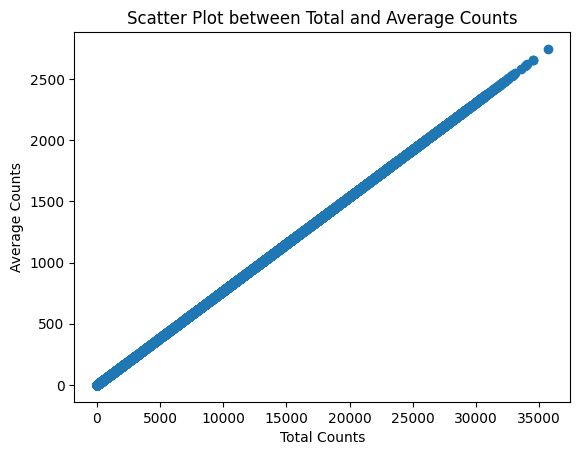

In [ ]:
plt.scatter(df['Total'], df['Average'])
plt.xlabel('Total Counts')
plt.ylabel('Average Counts')
plt.title('Scatter Plot between Total and Average Counts')
plt.show()
#it may indicate that the overall passenger traffic (total counts) and the average traffic on a per-hour basis are consistently stable or growing together.

## DayOfWeek with months vs. Total Counts for all Months: this is same as Total Passenger Count per Day of the Week Across Months

In [ ]:
pivot_df = df.pivot_table(index='Month', columns='DayOfWeek', values='Total', aggfunc='sum')

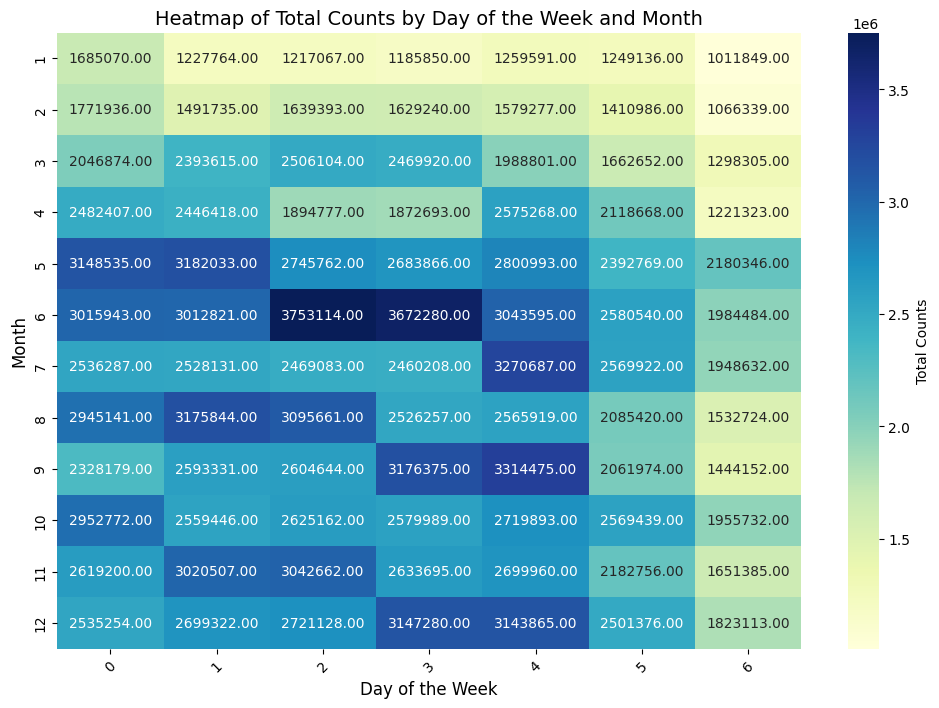

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df, cmap='YlGnBu', annot=True, fmt='.2f', cbar_kws={'label': 'Total Counts'})
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Month', fontsize=12)
plt.title('Heatmap of Total Counts by Day of the Week and Month', fontsize=14)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

plt.show()

## Total counts vs type

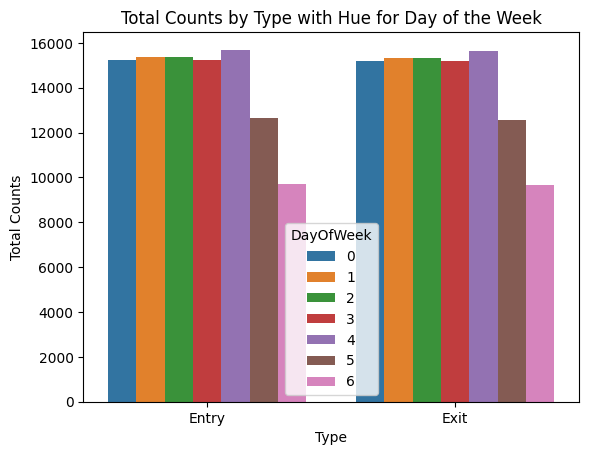

'peaks at friday consistent'

In [ ]:
sns.barplot(x='Type', y='Total', data=df, errorbar=None, hue='DayOfWeek')
plt.xlabel('Type')
plt.ylabel('Total Counts')
plt.title('Total Counts by Type with Hue for Day of the Week')
plt.show()
"peaks at friday consistent"

## Correlation Coefficient
#A correlation coefficient is a number between -1 and 1 that tells you the strength and direction of a relationship between variables. In other words, it reflects how similar the measurements of two or more variables are across a dataset. Correlation coefficient value



### Close to 1 or -1: Strong correlation.
###Around 0.7 to 0.3 or -0.7 to -0.3: Moderate correlation.
###Close to 0: Weak or no correlation.

In [ ]:
columns_for_correlation = ['Type', 'North Ave', 'Quezon Ave', 'GMA Kamuning', 'Cubao', 'Santolan', 'Ortigas', 'Shaw Blvd', 'Boni Ave', 'Guadalupe', 'Buendia', 'Ayala Ave', 'Magallanes', 'Taft']

correlation_df = df[columns_for_correlation].copy()

# Encode 'Type' as a numerical variable (assuming 'Entry' is 0 and 'Exit' is 1)
correlation_df['Type'] = correlation_df['Type'].map({'Entry': 0, 'Exit': 1})

In [ ]:
correlation_df

,Type,North Ave,Quezon Ave,GMA Kamuning,Cubao,Santolan,Ortigas,Shaw Blvd,Boni Ave,Guadalupe,Buendia,Ayala Ave,Magallanes,Taft
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,227,177,453,482,27,157,454,150,227,58,199,221,525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17507,0,0,8,32,101,49,271,325,135,325,44,248,83,439
17508,1,1,0,0,0,0,0,0,0,0,0,0,0,0
17509,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17510,1,0,0,0,0,0,0,0,0,0,0,0,0,0


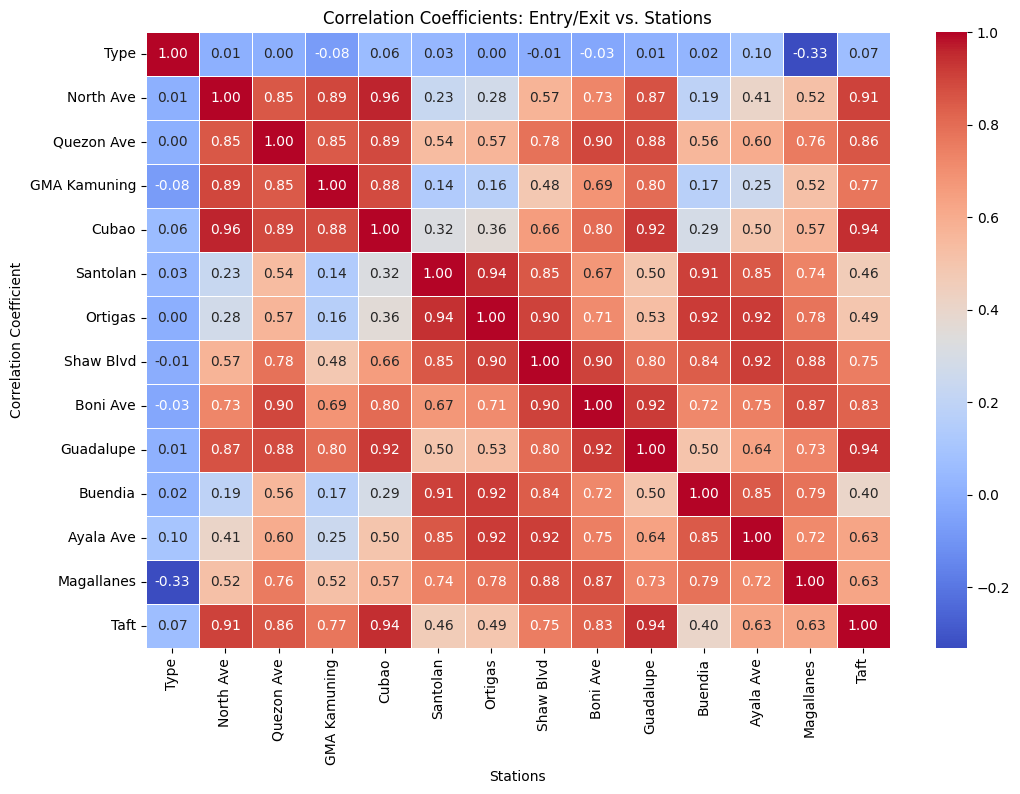

In [ ]:
correlation_matrix = correlation_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Coefficients: Entry/Exit vs. Stations')
plt.xlabel('Stations')
plt.ylabel('Correlation Coefficient')
plt.show()

<ipython-input-55-5f47d8d18c2c>:7: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  correlation_df.loc[:, 'Type'] = correlation_df['Type'].map({'Entry': 0, 'Exit': 1})


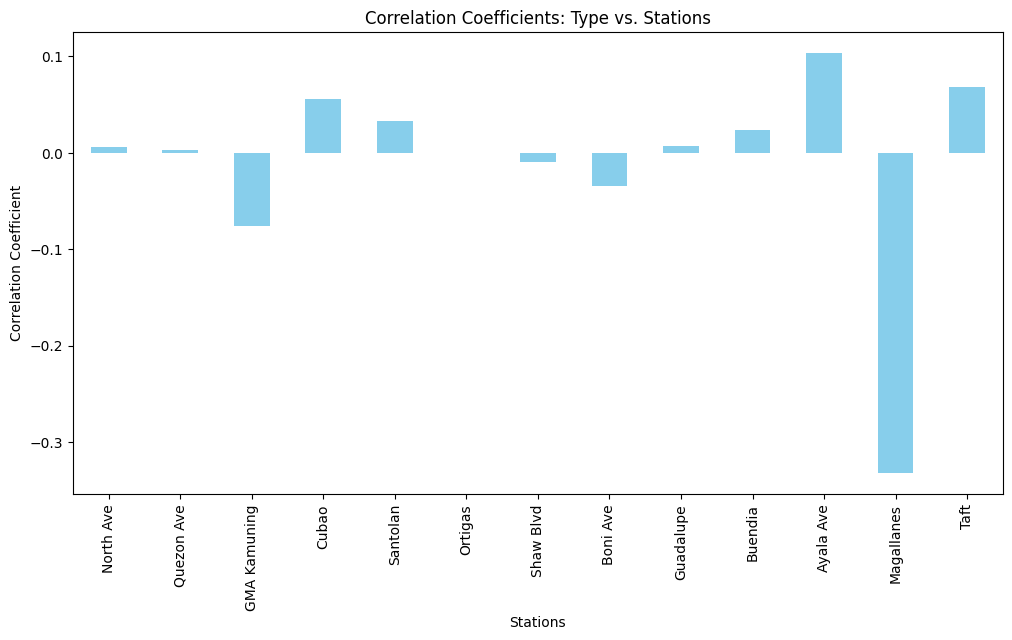

In [ ]:
columns_for_correlation = ['Type', 'North Ave', 'Quezon Ave', 'GMA Kamuning', 'Cubao', 'Santolan', 'Ortigas', 'Shaw Blvd', 'Boni Ave', 'Guadalupe', 'Buendia', 'Ayala Ave', 'Magallanes', 'Taft']

correlation_series = correlation_df.corr()['Type']

# Plot a bar plot of correlation coefficients
plt.figure(figsize=(12, 6))
correlation_series[1:].plot(kind='bar', color='skyblue')
plt.title('Correlation Coefficients: Entry/Exit vs. Stations')
plt.xlabel('Stations')
plt.ylabel('Correlation Coefficient')
plt.show()

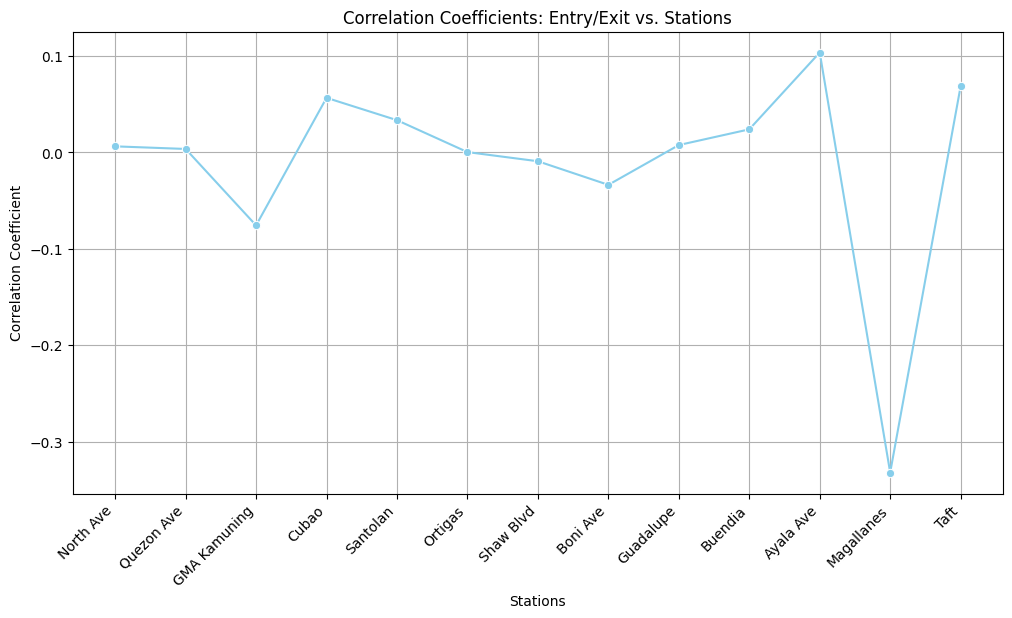

In [ ]:
correlation_df.loc[:, 'Type'] = correlation_df['Type'].map({'Entry': 0, 'Exit': 1})

correlation_series = correlation_df.corr()['Type']


plt.figure(figsize=(12, 6))
sns.lineplot(data=correlation_matrix.loc['Type', 'North Ave':], marker='o', color='skyblue')
plt.title('Correlation Coefficients: Entry/Exit vs. Stations')
plt.xlabel('Stations')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45, ha="right")
plt.grid(True)  # Add gridlines for better readability
plt.show()

# reminder: dont forget to conclude, say what is the optimal time to ride/optimal time for mrt management to fix etc

# **PHASE 5: RECOMMENDATIONS**

To re-state the objectives of the data-science project the group needs to be able to determine the optimal time to ride/optimal time for MRT's management to fix. The researchers applied a Univeriate and Bivariate analysis of the Passenger, Station, and Time data available in order to draw the following recommendations:

##**1. Station Optimization & Service Planning**
- MRT Management should consider peak rush-hour times and provide strategic implementations such as optimized staffing, increased security measures, and maintenance scheduling.
 - Maintenance Scheduling: Should be done either during Saturdays and on January - provided that this will affect the least amount of riders.
 - Optimized Staffing: Staffing should be optimized towards peak-hours, peak-days, and peak-months in order to better allocate resources throughout the course of operations throughout the year.
 - Increased Security Measures: Increasing security measures should be done for the peak-hours as a more cramped station would lead to higher cases of lost items. (6:00:00 - 8:00:00 & 17:00:00-21:00:00)
- MRT Management should also target improved service towards the following high exit stations: Araneta Center-Cubao, Santolan-Annapolis, Ayala, and Taft avenue.


##**2. Dynamic Pricing Scheme**
- A dynamic ticket pricing scheme could be implemented by MRT's management to further optimize days wherein total riders are low. This could be applied to days such as Fridays and Saturdays which experience comparatively lower amounts of riders.
- This may also be done on a time basis wherein tickets sold for 05:00:00, 21:00:00 or 9:00:00-16:00:00 may be sold at a lower price to make riders lean more towards these particular timeslots for their journeys. However, it should be noted that these particular times are outside of work entries and exits.

##**3. Optimal Time to Ride**
- Based on the bivariate analysis, riders should target times outside of these gathered rush-hour peaks:
  - 6:00:00 - 8:00:00
  - 17:00:00 - 21:00:00
- Avoiding the listed peaks would improve the rider's experience as they would be able to avoid cramped MRT trains and delays of service expected out of a high influx of riders.